In [1]:
import sys
!{sys.executable} -m pip install deap

In [2]:
import pandas as pd
import numpy as np
import random
from deap import base, creator, tools, algorithms
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Load dataset
data = pd.read_csv('./kc1.csv')

# Drop any missing values
data = data.dropna()

# Separate features and target
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
# GA code:

#Evaluation function for ranking
def evalMetricRanking(individual):
    # Use the order in the individual to select features
    X_train_ordered = X_train[:, individual]
    X_test_ordered = X_test[:, individual]
    
    # For demonstration, just using first three ordered features for evaluation
    X_train_selected = X_train_ordered[:, :3]
    X_test_selected = X_test_ordered[:, :3]
    
    clf = GaussianNB()
    clf.fit(X_train_selected, y_train)
    y_pred = clf.predict(X_test_selected)
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy,

# Setting up the Genetic Algorithm

# Creating types
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

# Registering the functions
toolbox = base.Toolbox()
N_FEATURES = X_train.shape[1]
toolbox.register("indices", random.sample, range(N_FEATURES), N_FEATURES)
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("mate", tools.cxPartialyMatched)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", evalMetricRanking)

# Running the Genetic Algorithm
pop = toolbox.population(n=50)
hof = tools.HallOfFame(1)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("min", np.min)
stats.register("max", np.max)
algorithms.eaSimple(pop, toolbox, cxpb=0.7, mutpb=0.2, ngen=20, stats=stats, halloffame=hof, verbose=True)


gen	nevals	avg     	min     	max     
0  	50    	0.829905	0.803318	0.850711
1  	33    	0.83782 	0.822275	0.850711
2  	43    	0.840569	0.819905	0.850711
3  	44    	0.842749	0.822275	0.850711
4  	43    	0.845166	0.827014	0.850711
5  	37    	0.848483	0.827014	0.850711
6  	36    	0.850711	0.850711	0.850711
7  	31    	0.850474	0.838863	0.850711
8  	40    	0.850047	0.836493	0.850711
9  	39    	0.850379	0.836493	0.850711
10 	35    	0.85    	0.831754	0.850711
11 	44    	0.850711	0.850711	0.850711
12 	36    	0.850047	0.836493	0.850711
13 	32    	0.850332	0.836493	0.850711
14 	38    	0.850142	0.834123	0.850711
15 	42    	0.849858	0.831754	0.850711
16 	36    	0.849858	0.831754	0.850711
17 	39    	0.850427	0.841232	0.850711
18 	26    	0.850711	0.850711	0.850711
19 	34    	0.850379	0.834123	0.850711
20 	39    	0.849336	0.829384	0.850711


([[9, 19, 15, 3, 8, 14, 11, 10, 17, 4, 20, 0, 2, 18, 7, 12, 13, 16, 6, 1, 5],
  [9, 19, 15, 3, 10, 11, 8, 7, 13, 14, 2, 0, 17, 16, 20, 6, 4, 18, 1, 12, 5],
  [9, 15, 19, 3, 6, 13, 8, 7, 17, 14, 18, 0, 2, 16, 20, 12, 10, 4, 1, 11, 5],
  [9, 19, 15, 16, 12, 8, 1, 6, 11, 13, 7, 0, 17, 2, 20, 14, 4, 18, 3, 10, 5],
  [9, 19, 15, 3, 13, 8, 10, 12, 2, 17, 14, 0, 1, 16, 6, 18, 4, 11, 7, 20, 5],
  [9, 19, 15, 3, 2, 16, 8, 20, 1, 4, 7, 0, 14, 11, 17, 10, 13, 6, 12, 18, 5],
  [9, 15, 19, 3, 14, 20, 8, 4, 12, 13, 7, 0, 6, 10, 11, 17, 18, 16, 1, 2, 5],
  [9, 19, 15, 3, 2, 4, 0, 16, 6, 14, 10, 11, 17, 20, 7, 13, 1, 8, 18, 12, 5],
  [9, 19, 15, 0, 7, 13, 8, 17, 4, 14, 12, 3, 11, 16, 6, 10, 20, 2, 1, 18, 5],
  [9, 19, 15, 0, 7, 13, 8, 12, 4, 14, 17, 3, 11, 16, 6, 10, 20, 2, 1, 18, 5],
  [9, 15, 19, 3, 11, 5, 4, 8, 10, 12, 13, 7, 17, 2, 6, 14, 18, 20, 1, 0, 16],
  [9, 19, 15, 3, 6, 12, 11, 10, 2, 13, 7, 0, 17, 16, 18, 20, 14, 4, 8, 1, 5],
  [9, 19, 15, 3, 8, 17, 20, 4, 6, 14, 7, 13, 12, 18, 11, 10, 0, 

Best ranked features:  [9, 19, 15]
Accuracy:  0.8507109004739336
              precision    recall  f1-score   support

       False       0.87      0.96      0.92       356
        True       0.55      0.26      0.35        66

    accuracy                           0.85       422
   macro avg       0.71      0.61      0.63       422
weighted avg       0.82      0.85      0.83       422



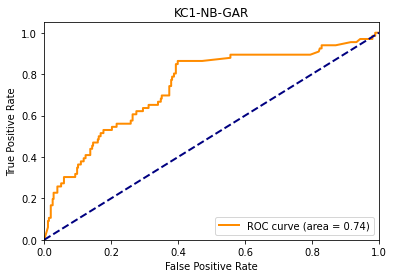

In [4]:
# Train and evaluate the KNN classifier using the best ranked features
best_ranking = hof[0]
# Let's say we use the top 3 ranked features (you can adjust this number)
selected_features = best_ranking[:3]
print("Best ranked features: ", selected_features)

X_train_selected = X_train[:, selected_features]
X_test_selected = X_test[:, selected_features]

clf = GaussianNB()
clf.fit(X_train_selected, y_train)

# Test the classifier
y_pred = clf.predict(X_test_selected)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Probabilities for the positive outcome
y_pred_proba = clf.predict_proba(X_test_selected)[:,1]
# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Save AUC values
df = pd.DataFrame({
    'AUC': roc_auc,
    'FPR': fpr,
    'TPR': tpr
})
df.to_csv('./AUC_Extracts/KC1/KC1_NB_GAR.csv', index=False)

# Plot
plt.figure()
lw = 2  # line width
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KC1-NB-GAR')
plt.legend(loc="lower right")
plt.show()
